In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
df = pd.read_excel('./data/small-house-data.xlsx')

In [3]:
df

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680
...,...,...
21608,360000,1530
21609,400000,2310
21610,402101,1020
21611,400000,1600


In [4]:
df.dtypes

price          int64
sqft_living    int64
dtype: object

In [5]:
df.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


In [6]:
df.min()

price          75000
sqft_living      290
dtype: int64

In [7]:
df.max()

price          7700000
sqft_living      13540
dtype: int64

In [8]:
ranges = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]
priceBased = df.groupby([(pd.cut(df.price, ranges))]).mean()

In [9]:
priceBased['sqft_living']

price
(0, 1000000]          1954.830008
(1000000, 2000000]    3603.945541
(2000000, 3000000]    4700.973856
(3000000, 4000000]    5493.529412
(4000000, 5000000]    7537.500000
(5000000, 6000000]    8150.000000
Name: sqft_living, dtype: float64

In [10]:
ranges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
sqftBased = df.groupby([(pd.cut(df.sqft_living, ranges))]).mean()

In [11]:
sqftBased['price']

sqft_living
(0, 1000]        2.983010e+05
(1000, 2000]     3.988030e+05
(2000, 3000]     5.793112e+05
(3000, 4000]     8.727551e+05
(4000, 5000]     1.326125e+06
(5000, 6000]     1.783965e+06
(6000, 7000]     2.136571e+06
(7000, 8000]     2.680534e+06
(8000, 9000]     3.766267e+06
(9000, 10000]    5.707667e+06
Name: price, dtype: float64

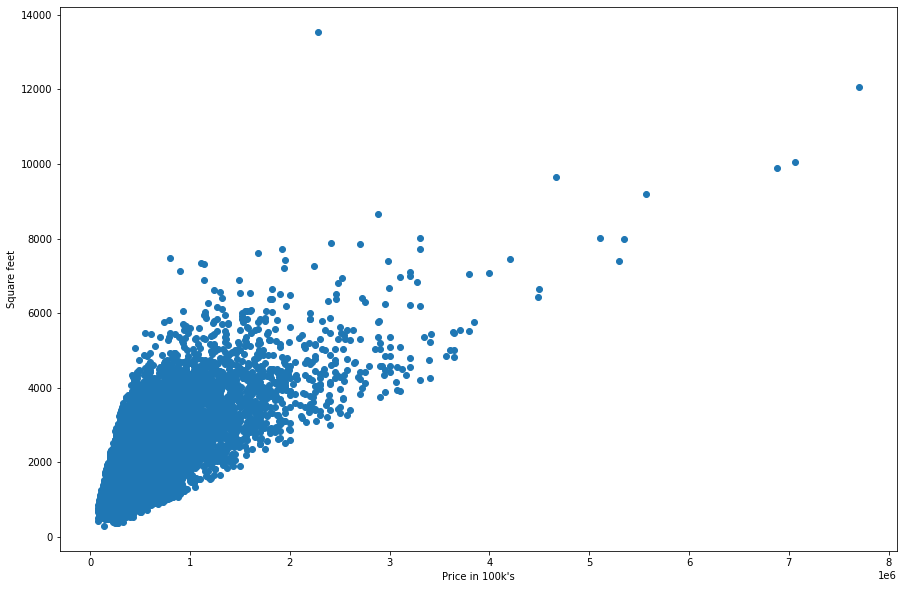

In [12]:
plt.figure(figsize=(15, 10))
plt.xlabel("Price in 100k's")
plt.ylabel("Square feet")
plt.scatter(df['price'], df['sqft_living'])

plt.show()

In [13]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [14]:
df['price_per_sqft'].min()

87.58823529411765

In [15]:
df['price_per_sqft'].max()

810.1388888888889

In [16]:
df

,price,sqft_living,price_per_sqft
0,221900,1180,188.050847
1,538000,2570,209.338521
2,180000,770,233.766234
3,604000,1960,308.163265
4,510000,1680,303.571429
...,...,...,...
21608,360000,1530,235.294118
21609,400000,2310,173.160173
21610,402101,1020,394.216667
21611,400000,1600,250.000000


In [17]:
df.describe()

,price,sqft_living,price_per_sqft
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,264.156594
std,3.671272e+05,918.440897,110.060793
min,7.500000e+04,290.000000,87.588235
25%,3.219500e+05,1427.000000,182.291667
50%,4.500000e+05,1910.000000,244.644550
75%,6.450000e+05,2550.000000,318.322981
max,7.700000e+06,13540.000000,810.138889


In [18]:
df['price_per_sqft'].mean()

264.15659369451447

In [19]:
df.corr()

,price,sqft_living,price_per_sqft
price,1.000000,0.702035,0.554703
sqft_living,0.702035,1.000000,-0.092314
price_per_sqft,0.554703,-0.092314,1.000000


In [20]:
ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
priceBySqft = df.groupby([(pd.cut(df.price_per_sqft, ranges))]).mean()

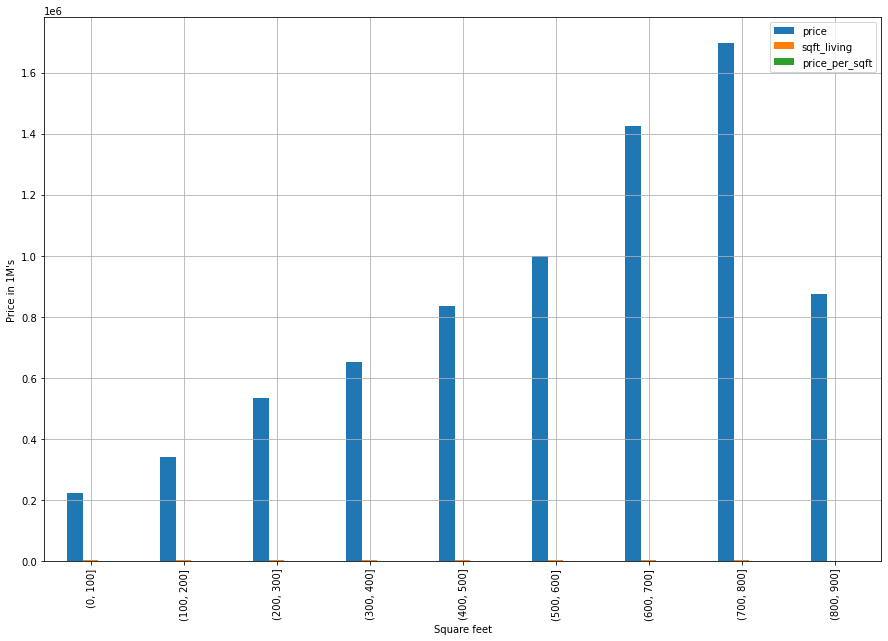

In [21]:
priceBySqft.plot.bar(figsize=(15, 10))
plt.ylabel("Price in 1M's")
plt.xlabel("Square feet")
plt.grid()

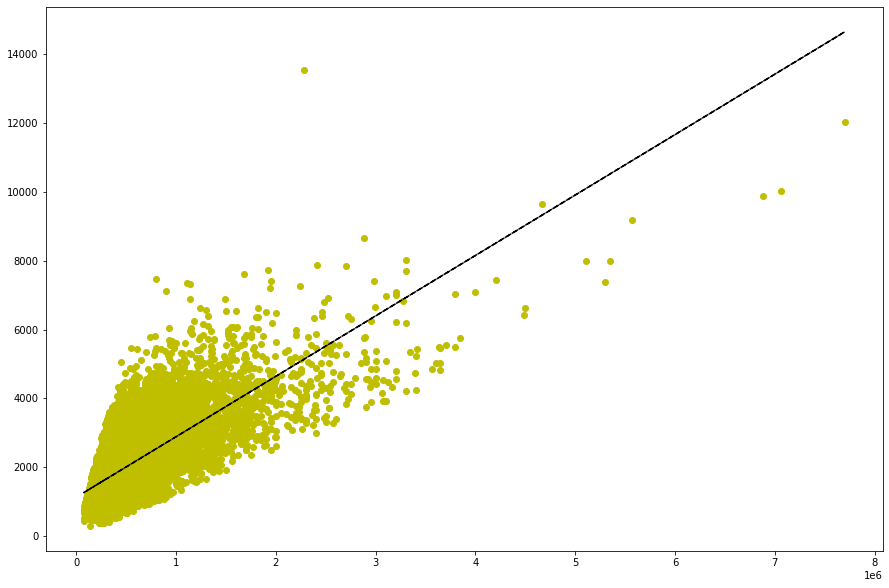

In [22]:
coef = np.polyfit(df['price'],df['sqft_living'],1)
poly1d_fn = np.poly1d(coef)
plt.figure(figsize=(15, 10))
plt.plot(df['price'],df['sqft_living'], 'yo', df['price'], poly1d_fn(df['price']), '--k')

<AxesSubplot:>

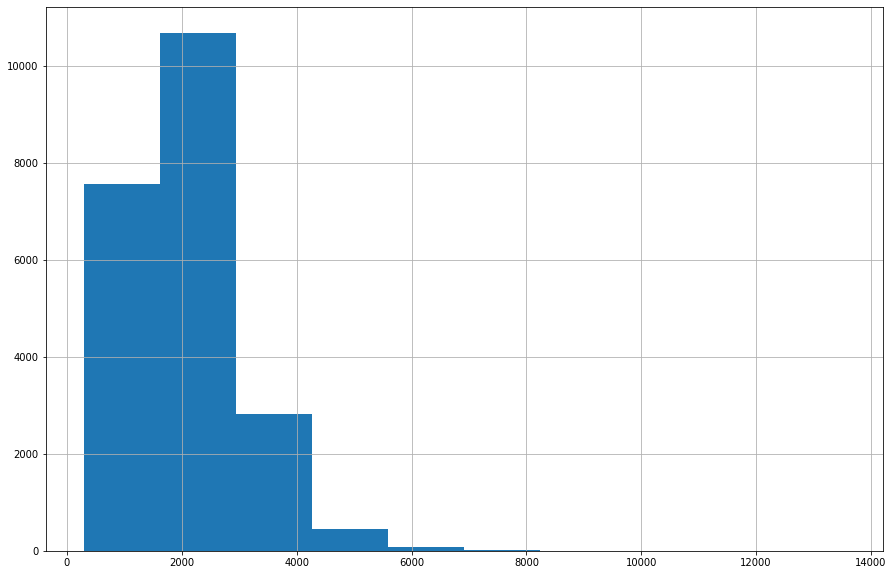

In [23]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
df['sqft_living'].hist(ax=ax)

<Figure size 1440x1440 with 0 Axes>

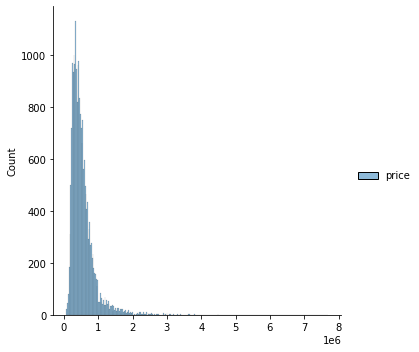

In [24]:
plt.figure(figsize=(20,20))
sns.displot([df['price']])

In [25]:
df_corr = df.corr()

<AxesSubplot:>

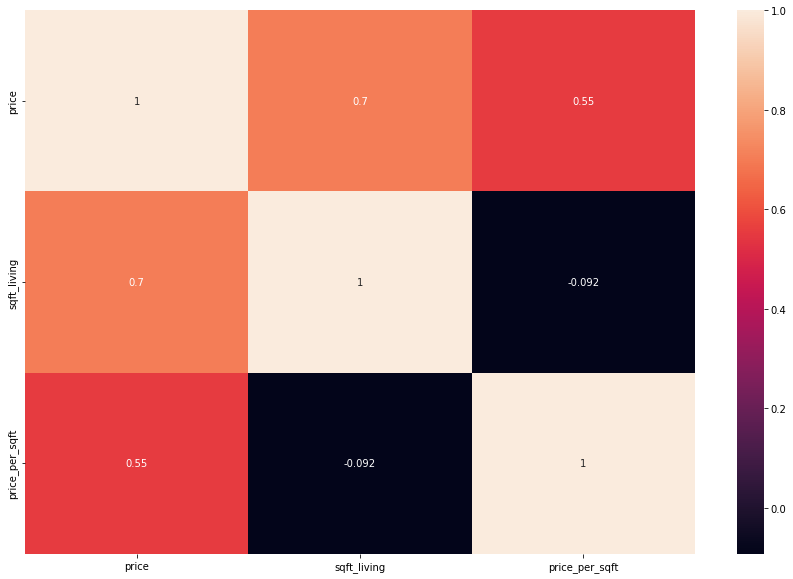

In [26]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(df_corr, annot=True, ax=ax)

In [27]:
# Add column with square meters
df['sqm_living'] = df['sqft_living']*0.09290304

In [28]:
# Predicted price
def predicted_price(x: float, a: float, b: float) -> float:
    return (b*x+a)

In [29]:
# Import different stuff.
from typing import List, Tuple
from numpy import mean
from numpy import std
from numpy import cov
Vector = List[float]

In [30]:
# The Error
def error(a: float, b: float, x: float, y: float) -> float:
    return y-predicted_price(a, b, x)

In [31]:

def sum_err(a: float, b:float, x: Vector, y: Vector) -> float:
    return sum(error(a, b, xi, yi)**2 for xi, yi in zip(x,y))

In [32]:
def least_sq(x: Vector, y: Vector) -> Tuple[float, float]:
    r = cov(x, y) / (std(x)*std(y))
    b = r * (std(y)/std(x))
    a = mean(y)-b*mean(x)
    return a, b[0]

In [33]:
x = df['sqft_living'].values
y = df['price'].values
# x = df.iloc[:,0:1]
# y = df.iloc[:,1:2]

In [34]:
a, b = least_sq(x, y)
a, b

(array([[ 5.38008146e+05, -4.36077498e+04],
        [-4.36077498e+04, -3.31807998e+08]]),
 array([  1.00004627, 280.63655252]))

In [35]:
sum_err(a, b, x, y)

array([[3.23083354e+22, 2.15037573e+20],
       [2.15038676e+20, 1.23008776e+28]])

***

In [37]:
# Calculate accuraty
X = pd.DataFrame(df['price'])
y = pd.DataFrame(df['sqm_living'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (x1, y1) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[x1,:], y.iloc[x1,:])
    score = model.score(X.iloc[y1,:], y.iloc[y1,:])
    scores.append(score)
print(scores)

[0.4894253379207767, 0.49851898041264286, 0.48913520630929286]


***